In [1]:
import keras 
from keras import layers
from keras import models
import numpy as np
import os

Using TensorFlow backend.


# Model

In [2]:
model =models.Sequential()
model.add(layers.Conv2D(8, kernel_size=2, padding='valid', strides=1, activation='relu', input_shape=(82, 82, 3)))
model.add(layers.Conv2D(16, kernel_size=2, padding='valid', strides=1, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(32, kernel_size=2, padding='valid', strides=1, activation='relu'))
model.add(layers.Conv2D(64, kernel_size=2, padding='valid', strides=1, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(300, activation='relu', name='dense4'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(100, activation='softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 81, 81, 8)         104       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 80, 80, 16)        528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 80, 80, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 79, 79, 32)        2080      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 78, 78, 64)        8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 78, 78, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 39, 39, 64)       

## ImageAugmentation

In [3]:
train_data = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                    featurewise_center=True, 
                                    samplewise_center=True, 
                                    featurewise_std_normalization=True, 
                                    samplewise_std_normalization=True, 
                                    zca_whitening=False, zca_epsilon=1e-06, 
                                    rotation_range=40, width_shift_range=0.0,
                                    height_shift_range=0.0, brightness_range=(0.2, 0.2),
                                    shear_range=0.2, zoom_range=0.2, 
                                    channel_shift_range=0.0, fill_mode='nearest', 
                                    cval=0.0, horizontal_flip=True, vertical_flip=True,
                                    data_format=None, validation_split=0.0, dtype=None)

# Test and Train

In [4]:
test = train_data.flow_from_directory(r"C:\Users\SUPERMAN\Desktop\hand\image_Sep\test\\",
                                     target_size=(82, 82), classes = [str(x) for x in range(100)],
                                     class_mode='categorical', batch_size=64, seed=1)
train = train_data.flow_from_directory(r"C:\Users\SUPERMAN\Desktop\hand\image_Sep\train\\",
                                     target_size=(82, 82), classes = [str(x) for x in range(100)],
                                     class_mode='categorical', batch_size=64, seed=1)

Found 1000 images belonging to 100 classes.
Found 8900 images belonging to 100 classes.


In [5]:
class_ = test.classes

### Function for Metrics

In [6]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Compiler

In [7]:
model.compile(optimizer = 'sgd',
              loss = 'categorical_crossentropy',
              metrics=['accuracy', recall_m, precision_m, f1_m])

# Fitting 

In [8]:
history = model.fit_generator(train, steps_per_epoch=10000//64,
                    epochs=100, validation_data=test,
                    validation_steps=80, verbose=1, )

Epoch 1/100


C:\Users\SUPERMAN\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\SUPERMAN\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


156/156 [==============================] - 165s 1s/step - loss: 4.5388 - accuracy: 0.0285 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 4.3553 - val_accuracy: 0.0710 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 2/100
156/156 [==============================] - 108s 691ms/step - loss: 4.1952 - accuracy: 0.0782 - recall_m: 0.0036 - precision_m: 0.1624 - f1_m: 0.0070 - val_loss: 4.0438 - val_accuracy: 0.1222 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 3/100
156/156 [==============================] - 108s 691ms/step - loss: 3.8437 - accuracy: 0.1264 - recall_m: 0.0161 - precision_m: 0.5139 - f1_m: 0.0310 - val_loss: 3.8148 - val_accuracy: 0.1820 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 4/100
156/156 [==============================] - 108s 693ms/step - loss: 3.5656 - accuracy: 0.1758 - recall_m: 0.0356 - precision_m: 0.6578 - f1_m: 

156/156 [==============================] - 108s 691ms/step - loss: 1.4933 - accuracy: 0.5921 - recall_m: 0.4394 - precision_m: 0.7975 - f1_m: 0.5651 - val_loss: 2.1501 - val_accuracy: 0.5054 - val_recall_m: 0.1841 - val_precision_m: 0.9246 - val_f1_m: 0.3046
Epoch 32/100
156/156 [==============================] - 108s 693ms/step - loss: 1.4871 - accuracy: 0.5918 - recall_m: 0.4398 - precision_m: 0.8002 - f1_m: 0.5662 - val_loss: 1.8458 - val_accuracy: 0.5042 - val_recall_m: 0.2059 - val_precision_m: 0.9152 - val_f1_m: 0.3339
Epoch 33/100
156/156 [==============================] - 109s 696ms/step - loss: 1.4517 - accuracy: 0.6031 - recall_m: 0.4571 - precision_m: 0.8094 - f1_m: 0.5825 - val_loss: 1.7563 - val_accuracy: 0.5364 - val_recall_m: 0.2112 - val_precision_m: 0.9170 - val_f1_m: 0.3407
Epoch 34/100
156/156 [==============================] - 108s 692ms/step - loss: 1.4326 - accuracy: 0.6031 - recall_m: 0.4649 - precision_m: 0.8010 - f1_m: 0.5867 - val_loss: 2.2320 - val_accuracy: 

156/156 [==============================] - 108s 689ms/step - loss: 0.6476 - accuracy: 0.8027 - recall_m: 0.7416 - precision_m: 0.8770 - f1_m: 0.8030 - val_loss: 1.6742 - val_accuracy: 0.5958 - val_recall_m: 0.4288 - val_precision_m: 0.8276 - val_f1_m: 0.5631
Epoch 92/100
156/156 [==============================] - 108s 692ms/step - loss: 0.6275 - accuracy: 0.8056 - recall_m: 0.7426 - precision_m: 0.8777 - f1_m: 0.8037 - val_loss: 1.3676 - val_accuracy: 0.5954 - val_recall_m: 0.4280 - val_precision_m: 0.8051 - val_f1_m: 0.5572
Epoch 93/100
156/156 [==============================] - 108s 692ms/step - loss: 0.6226 - accuracy: 0.8101 - recall_m: 0.7550 - precision_m: 0.8816 - f1_m: 0.8129 - val_loss: 1.3895 - val_accuracy: 0.6056 - val_recall_m: 0.4581 - val_precision_m: 0.8247 - val_f1_m: 0.5878
Epoch 94/100
156/156 [==============================] - 108s 692ms/step - loss: 0.6980 - accuracy: 0.7932 - recall_m: 0.7278 - precision_m: 0.8673 - f1_m: 0.7907 - val_loss: 1.8155 - val_accuracy: 

In [9]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'val_recall_m', 'val_precision_m', 'val_f1_m', 'loss', 'accuracy', 'recall_m', 'precision_m', 'f1_m'])

In [10]:
import pandas as pd

# Data Frame

In [11]:
data_csv = pd.DataFrame(data=history.history)
data_csv.head()

,val_loss,val_accuracy,val_recall_m,val_precision_m,val_f1_m,loss,accuracy,recall_m,precision_m,f1_m
0,4.355263,0.0710,0.000000,0.0000,0.000000,4.538037,0.028517,0.000000,0.000000,0.000000
1,4.043817,0.1222,0.000000,0.0000,0.000000,4.192393,0.078194,0.003606,0.162393,0.007029
2,3.814821,0.1820,0.000000,0.0000,0.000000,3.842703,0.126360,0.016126,0.513889,0.030993
3,3.639455,0.2098,0.000195,0.0125,0.000385,3.570682,0.175836,0.035557,0.657828,0.066635
4,3.741517,0.2500,0.002344,0.1375,0.004604,3.368065,0.209043,0.053886,0.691776,0.098404


# Saving CSV

In [12]:
data_csv.to_csv("metris.csv")

# Accuracy

In [13]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['val_loss', 'val_accuracy', 'val_recall_m', 'val_precision_m', 'val_f1_m', 'loss', 'accuracy', 'recall_m', 'precision_m', 'f1_m'])


<Figure size 640x480 with 1 Axes>

# Loss

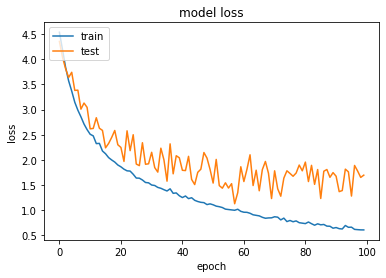

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Recall

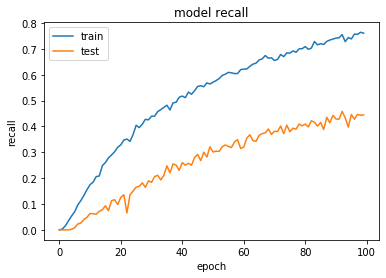

In [15]:
plt.plot(history.history['recall_m'])
plt.plot(history.history['val_recall_m'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Precision

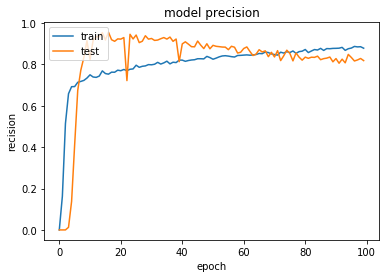

In [16]:
plt.plot(history.history['precision_m'])
plt.plot(history.history['val_precision_m'])
plt.title('model precision')
plt.ylabel('recision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# F1_Score

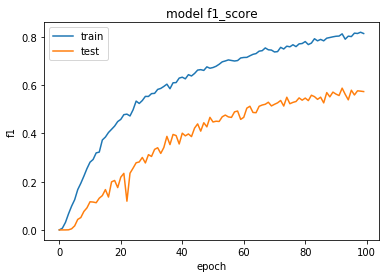

In [17]:
plt.plot(history.history['f1_m'])
plt.plot(history.history['val_f1_m'])
plt.title('model f1_score')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Predicting

In [18]:
y_pred = model.predict(test)

C:\Users\SUPERMAN\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\SUPERMAN\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, t)

0.014

In [19]:
y_pred = np.argmax(y_pred, axis=-1)

# Confusion matrix

Confusion Matrix


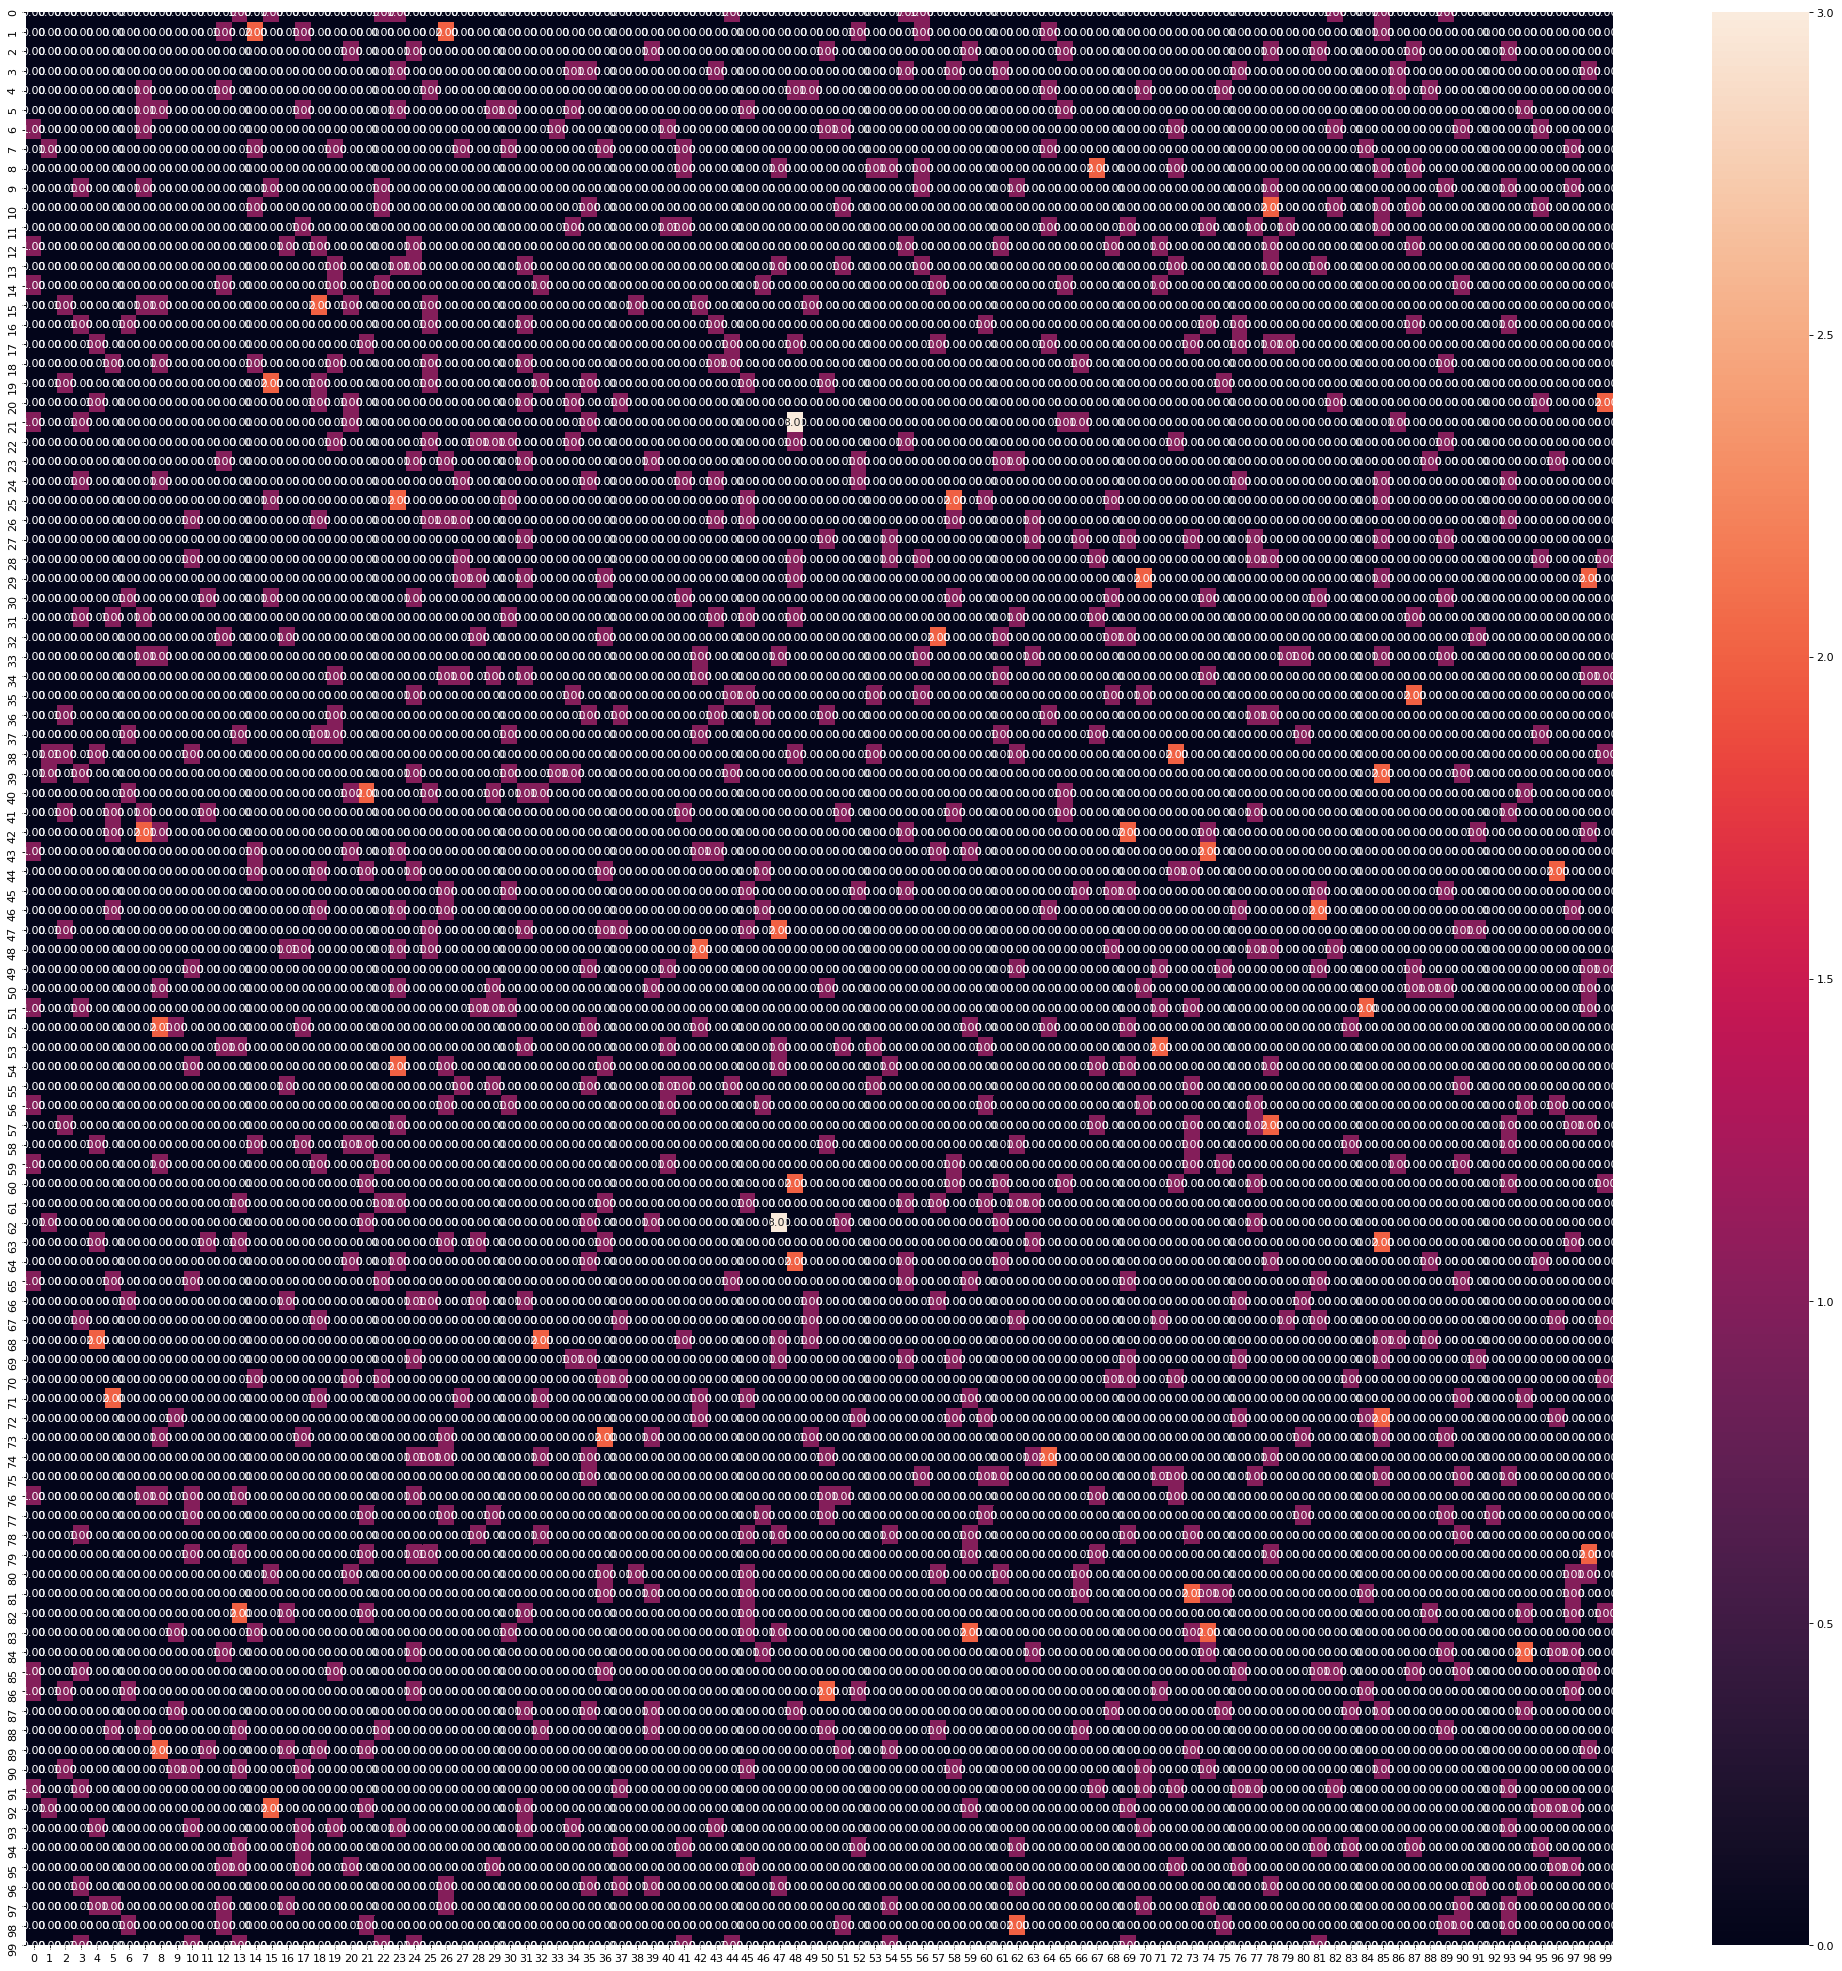

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib.pyplot import figure
figure(num=None, figsize=(32, 32), dpi=80, facecolor='w', edgecolor='k')

print('Confusion Matrix')
#print(sns.heatmap(confusion_matrix(class_, y_pred), fmt='.2f', annot=True))
img = sns.heatmap(confusion_matrix(class_, y_pred), fmt='.2f', annot=True)
img.figure.savefig("confusion_matrix.jpg")